# Linear Regression
It is a supervised machine learning algorithm used for predicting regression tasks which have a linear relationship between input(independent variable) and output(dependent variable)

Here we will use the dataset of diabetes which is present in scikit-learn library

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [9]:
X_df = pd.DataFrame(X, columns=diabetes.feature_names)
y_df = pd.DataFrame(y)

In [13]:
print(f"Shape of features: {X.shape}")
print(f"Shape of targets: {y.shape}")
print(f"First 5 rows of datasets {X_df.head(5)}")

Shape of features: (442, 10)
Shape of targets: (442,)
First 5 rows of datasets         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of test set: {X_test.shape}")
print(f"Shape of target set: {y_test.shape}")
model = LinearRegression()
model.fit(X_train, y_train)

Shape of training set: (353, 10)
Shape of test set: (89, 10)
Shape of target set: (89,)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test)

In [18]:
print(f"5 actual target values: (y_test)")
print(y_test[:5])
print(f"5 predicted target values: (y_pred)")
print(y_pred[:5])

5 actual target values: (y_test)
[219.  70. 202. 230. 111.]
5 predicted target values: (y_pred)
[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


In [19]:
mse = mean_squared_error(y_test, y_pred)

In [20]:
r2 = r2_score(y_test, y_pred)

In [21]:
print(f"MSE: {mse}")

MSE: 2900.19362849348


In [22]:
print(f"R2: {r2}")

R2: 0.4526027629719197


In [24]:
for feature, coef in zip(diabetes.feature_names, model.coef_):
    print(f"{feature}: {coef}")
print(f"model intercept: {model.intercept_}")

age: 37.90402135007452
sex: -241.9643623127402
bmi: 542.4287585162903
bp: 347.7038439138558
s1: -931.4888458835153
s2: 518.0622769833369
s3: 163.41998299131072
s4: 275.31790157864845
s5: 736.1988589046842
s6: 48.67065743196525
model intercept: 151.34560453985995


In [25]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

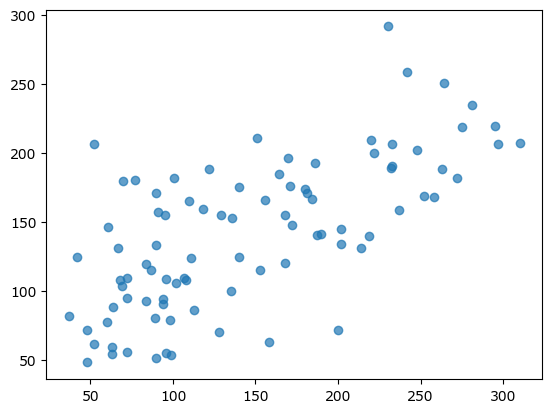

In [26]:
plt.scatter(y_test, y_pred, alpha=0.7)

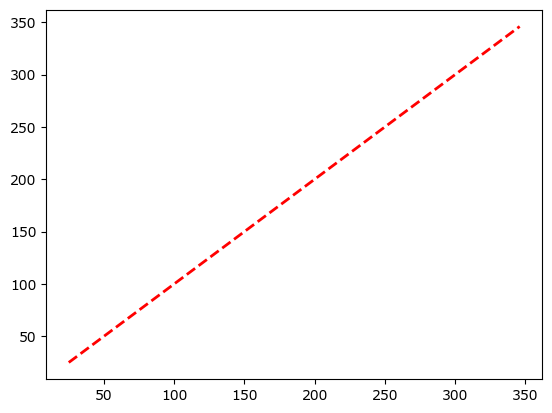

In [27]:
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)

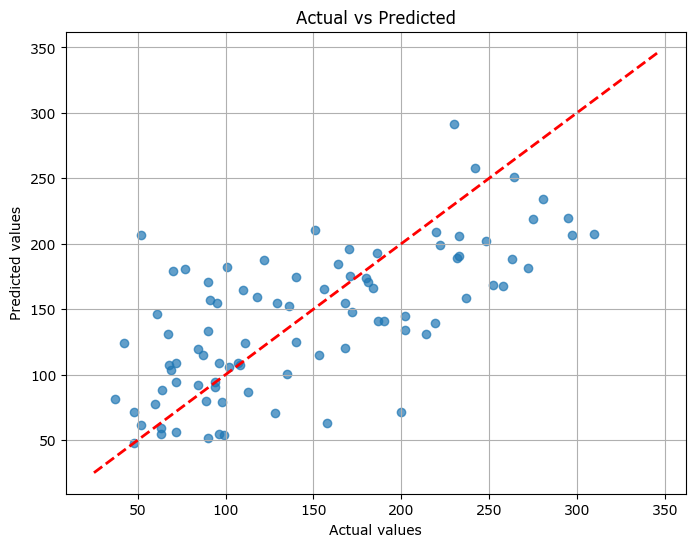

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

## Residuals Graph means Actual vs Predicted

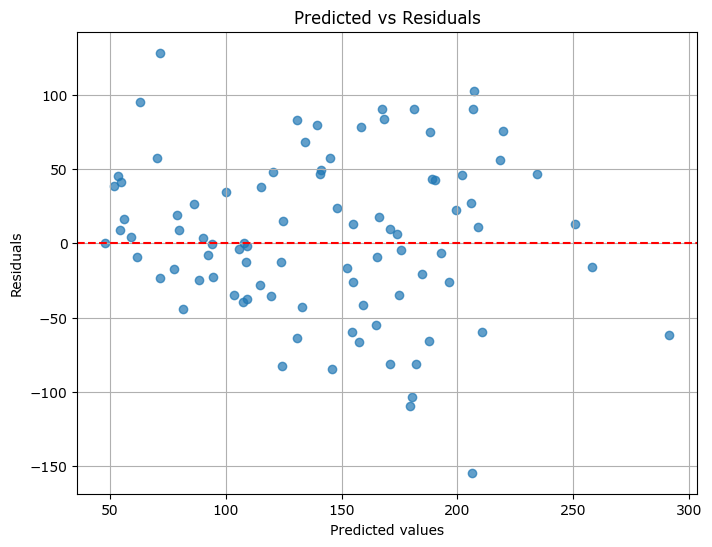

In [30]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.grid(True)
plt.show()

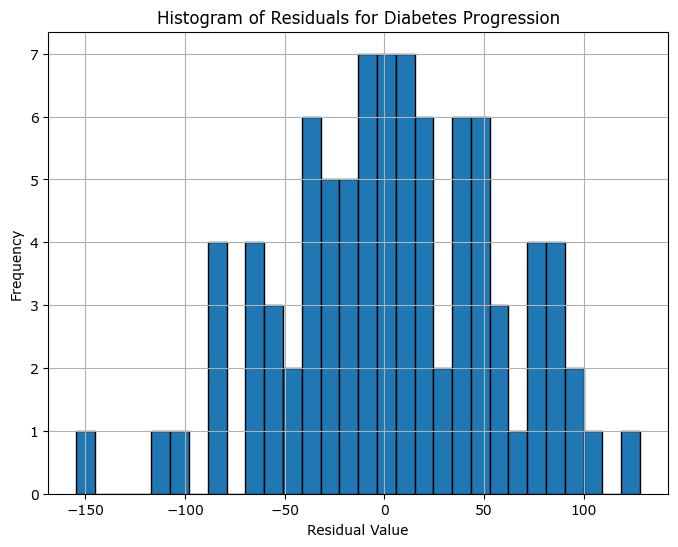

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for Diabetes Progression")
plt.grid(True)
plt.show()